# Import

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [14]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [15]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
psych = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [16]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(psych.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [17]:
import pandas as pd

file_path = "performance_employees_adjusted.xlsx"
base = pd.read_excel(file_path)

# Ambil hanya kolom yang dibutuhkan
base = base[['employee_id', 'rating', 'year']]

In [18]:
display(base.shape)
display(base)

(8084, 3)

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100002,2.0,2021
2,EMP100005,NaN,2021
3,EMP100006,4.0,2021
4,EMP100007,4.0,2021
...,...,...,...
8079,DUP1942,5.0,2025
8080,DUP2096,3.0,2025
8081,DUP4177,2.0,2025
8082,DUP9801,5.0,2025


# EDA

# Outlier Score

### Performance

In [19]:
display(psych.shape)
display(psych)

(2010, 9)

,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9
...,...,...,...,...,...,...,...,...,...
2005,DUP1942,55,54,CD,Conscientious-Dominant,ISFP,NaN,NaN,8
2006,DUP2096,27,62,SD,Steadiness-Dominant,ISFJ,NaN,NaN,4
2007,DUP4177,41,22,DS,Dominant-Steadiness,ENTJ,NaN,NaN,8
2008,DUP9801,37,64,SC,Steadiness-Conscientious,ISTJ,131.0,28.0,7


In [20]:
# Pivot data dari long ke wide
papi_wide = papi.pivot_table(
    index='employee_id',
    columns='scale_code',
    values='score'
).reset_index()

# Rapikan nama kolom (hapus multiindex kalau ada)
papi_wide.columns.name = None

# Lihat hasil
display(papi_wide.shape)
display(papi_wide.head())


(2010, 21)

,employee_id,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z
0,DUP1942,6.0,NaN,1.0,4.0,3.0,5.0,4.0,1.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN
1,DUP2096,1.0,6.0,9.0,3.0,4.0,1.0,2.0,6.0,9.0,3.0,1.0,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0
2,DUP2722,2.0,NaN,6.0,4.0,1.0,4.0,9.0,9.0,1.0,3.0,8.0,2.0,NaN,6.0,1.0,7.0,3.0,6.0,3.0,3.0
3,DUP3015,5.0,4.0,3.0,4.0,9.0,2.0,8.0,9.0,1.0,7.0,5.0,1.0,8.0,7.0,3.0,NaN,NaN,3.0,5.0,3.0
4,DUP3452,7.0,9.0,1.0,9.0,7.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,2.0,9.0,NaN,9.0,1.0,6.0,4.0


In [21]:
# ============================================================
# Gabungkan semua dataset berdasarkan employee_id
# ============================================================

# Mulai dari base
merged_df = base.merge(papi_wide, on='employee_id', how='left')
merged_df = merged_df.merge(psych, on='employee_id', how='left')

# ============================================================
# Cek hasil akhir
# ============================================================
print("✅ Data gabungan (base + PAPI + Psych):")
display(merged_df.shape)
display(merged_df.head())


✅ Data gabungan (base + PAPI + Psych):


(8084, 31)

,employee_id,rating,year,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,2.0,2021,1.0,6.0,5.0,NaN,1.0,3.0,5.0,8.0,NaN,7.0,2.0,9.0,3.0,7.0,9.0,3.0,4.0,4.0,2.0,1.0,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100002,2.0,2021,2.0,NaN,4.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,9.0,5.0,3.0,1.0,3.0,9.0,9.0,1.0,4.0,6.0,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
2,EMP100005,NaN,2021,NaN,5.0,4.0,6.0,6.0,7.0,3.0,NaN,5.0,1.0,NaN,NaN,6.0,2.0,8.0,1.0,8.0,2.0,8.0,9.0,69,35,DC,Dominant-Conscientious,NaN,130.0,21.0,7
3,EMP100006,4.0,2021,7.0,9.0,6.0,4.0,6.0,1.0,9.0,3.0,6.0,6.0,2.0,NaN,7.0,3.0,4.0,8.0,6.0,NaN,NaN,7.0,94,24,SC,Steadiness-Conscientious,ESFP,139.0,27.0,6
4,EMP100007,4.0,2021,1.0,2.0,5.0,2.0,2.0,7.0,1.0,7.0,7.0,2.0,7.0,9.0,9.0,9.0,3.0,3.0,5.0,9.0,NaN,6.0,65,45,DS,Dominant-Steadiness,ESFJ,99.0,17.0,4


In [22]:
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)  # kalau ingin semua baris juga muncul


In [23]:
summary = {}

for col in merged_df.columns:
    if merged_df[col].dtype in ['int64', 'float64']:
        min_val = merged_df[col].min()
        max_val = merged_df[col].max()
        summary[col] = f"{min_val} – {max_val}"
    else:
        unique_vals = merged_df[col].dropna().unique()
        summary[col] = list(unique_vals)

import pandas as pd
summary_df = pd.DataFrame(list(summary.items()), columns=["Kolom", "Ringkasan"])
summary_df


,Kolom,Ringkasan
0,employee_id,"[EMP100000, EMP100002, EMP100005, EMP100006, E..."
1,rating,1.0 – 5.0
2,year,2021 – 2025
3,Papi_A,1.0 – 9.0
4,Papi_B,1.0 – 9.0
5,Papi_C,1.0 – 9.0
6,Papi_D,1.0 – 9.0
7,Papi_E,1.0 – 9.0
8,Papi_F,1.0 – 9.0
9,Papi_G,1.0 – 9.0


In [24]:
# ============================================================
# Cek nilai unik dari kolom DISC dan MBTI
# ============================================================

print("🧩 Unique values dari DISC Word:")
print(merged_df['disc_word'].dropna().unique())
print("\nJumlah unique:", merged_df['disc_word'].nunique())

print("\n🧠 Unique values dari DISC (kode huruf):")
print(merged_df['disc'].dropna().unique())
print("\nJumlah unique:", merged_df['disc'].nunique())

print("\n🔤 Unique values dari MBTI:")
print(merged_df['mbti'].dropna().unique())
print("\nJumlah unique:", merged_df['mbti'].nunique())


🧩 Unique values dari DISC Word:
['Steadiness-Influencer' 'Dominant-Conscientious'
 'Steadiness-Conscientious' 'Dominant-Steadiness' 'Dominant-Influencer'
 'Conscientious-Steadiness' 'Influencer-Conscientious'
 'Influencer-Steadiness' 'Conscientious-Dominant'
 'Conscientious-Influencer' 'Influencer-Dominant' 'Steadiness-Dominant']

Jumlah unique: 12

🧠 Unique values dari DISC (kode huruf):
['SI' 'DC' 'SC' 'DS' 'DI' 'CS' 'IS' 'CD' 'IC' 'ID' 'CI' 'SD']

Jumlah unique: 12

🔤 Unique values dari MBTI:
['ESFP' 'ESFJ' 'ISFP' 'ENFP' 'ISTJ' 'ENTJ' 'INFP' 'ISTP' 'ESTJ' 'ESTP'
 'ISFJ' 'INTJ' 'ENTP' 'INTP' 'INFJ' 'ENFJ' 'enfp' 'inftj' 'Istp']

Jumlah unique: 19


In [25]:
merged_df['mbti'] = merged_df['mbti'].str.strip().str.upper()

In [26]:
pd.crosstab(merged_df['disc_word'], merged_df['disc'])


disc,CD,CI,CS,DC,DI,DS,IC,ID,IS,SC,SD,SI
disc_word,,,,,,,,,,,,
Conscientious-Dominant,700,0,0,0,0,0,0,0,0,0,0,0
Conscientious-Influencer,0,705,0,0,0,0,0,0,0,0,0,0
Conscientious-Steadiness,0,0,615,0,0,0,0,0,0,0,0,0
Dominant-Conscientious,0,0,0,664,0,0,0,0,0,0,0,0
Dominant-Influencer,0,0,0,0,618,0,0,0,0,0,0,0
Dominant-Steadiness,0,0,0,0,0,551,0,0,0,0,0,0
Influencer-Conscientious,0,0,0,0,0,0,601,0,0,0,0,0
Influencer-Dominant,0,0,0,0,0,0,0,596,0,0,0,0
Influencer-Steadiness,0,0,0,0,0,0,0,0,495,0,0,0


In [27]:
# Hapus kolom disc_word karena redundant
merged_df = merged_df.drop(columns=['disc_word'])

# Pastikan semua kode huruf rapi
merged_df['disc'] = merged_df['disc'].str.upper().str.strip()


In [28]:
# ============================================================
# Cek nilai unik dari kolom DISC dan MBTI
# ============================================================

print("\n🧠 Unique values dari DISC (kode huruf):")
print(merged_df['disc'].unique())
print("\nJumlah unique:", merged_df['disc'].nunique())

print("\n🔤 Unique values dari MBTI:")
print(merged_df['mbti'].unique())
print("\nJumlah unique:", merged_df['mbti'].nunique())



🧠 Unique values dari DISC (kode huruf):
['SI' 'DC' 'SC' 'DS' 'DI' 'CS' nan 'IS' 'CD' 'IC' 'ID' 'CI' 'SD']

Jumlah unique: 12

🔤 Unique values dari MBTI:
[nan 'ESFP' 'ESFJ' 'ISFP' 'ENFP' 'ISTJ' 'ENTJ' 'INFP' 'ISTP' 'ESTJ' 'ESTP'
 'ISFJ' 'INTJ' 'ENTP' 'INTP' 'INFJ' 'ENFJ' 'INFTJ']

Jumlah unique: 17


In [29]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7380.0,3.145257,1.065944,1.0,2.0,3.0,4.0,5.0
year,8084.0,2023.293790,1.358404,2021.0,2022.0,2023.0,2024.0,2025.0
Papi_A,7481.0,4.972731,2.549679,1.0,3.0,5.0,7.0,9.0
Papi_B,7391.0,4.895549,2.613988,1.0,3.0,5.0,7.0,9.0
Papi_C,7496.0,4.835379,2.541473,1.0,3.0,5.0,7.0,9.0
Papi_D,7437.0,4.984940,2.628216,1.0,3.0,5.0,7.0,9.0
Papi_E,7490.0,5.057810,2.611436,1.0,3.0,5.0,7.0,9.0
Papi_F,7389.0,5.097577,2.562712,1.0,3.0,5.0,7.0,9.0
Papi_G,7460.0,4.926676,2.582618,1.0,3.0,5.0,7.0,9.0
Papi_I,7431.0,5.051406,2.617787,1.0,3.0,5.0,7.0,9.0


## Psychometric Profiles

C:\Users\fajar\AppData\Local\Temp\ipykernel_40264\2564767430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='rating', palette='viridis')


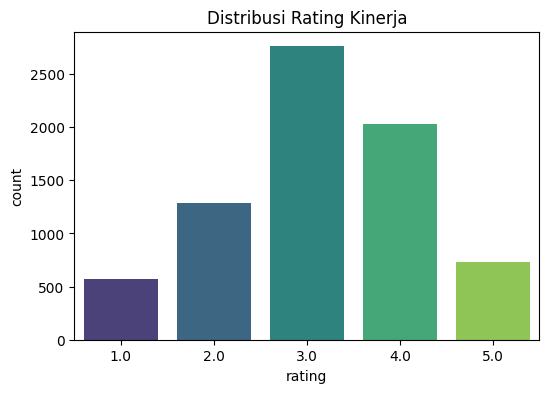

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='rating', palette='viridis')
plt.title('Distribusi Rating Kinerja')
plt.show()


In [31]:
papi_cols = [c for c in merged_df.columns if c.startswith('Papi_')]

papi_summary = merged_df.groupby('rating')[papi_cols].mean().T
display(papi_summary.round(2))


rating,1.0,2.0,3.0,4.0,5.0
Papi_A,5.10,4.99,4.89,5.06,4.85
Papi_B,4.83,4.84,4.93,4.86,4.85
Papi_C,4.81,4.84,4.83,4.85,4.81
Papi_D,4.84,4.98,5.03,4.99,4.97
Papi_E,5.41,4.99,5.06,4.99,5.08
Papi_F,4.96,5.08,5.06,5.12,5.24
Papi_G,4.78,4.93,4.88,5.00,4.91
Papi_I,5.07,4.99,5.08,5.04,4.97
Papi_K,5.11,5.12,4.96,5.09,4.92
Papi_L,5.08,5.11,5.07,5.06,5.01


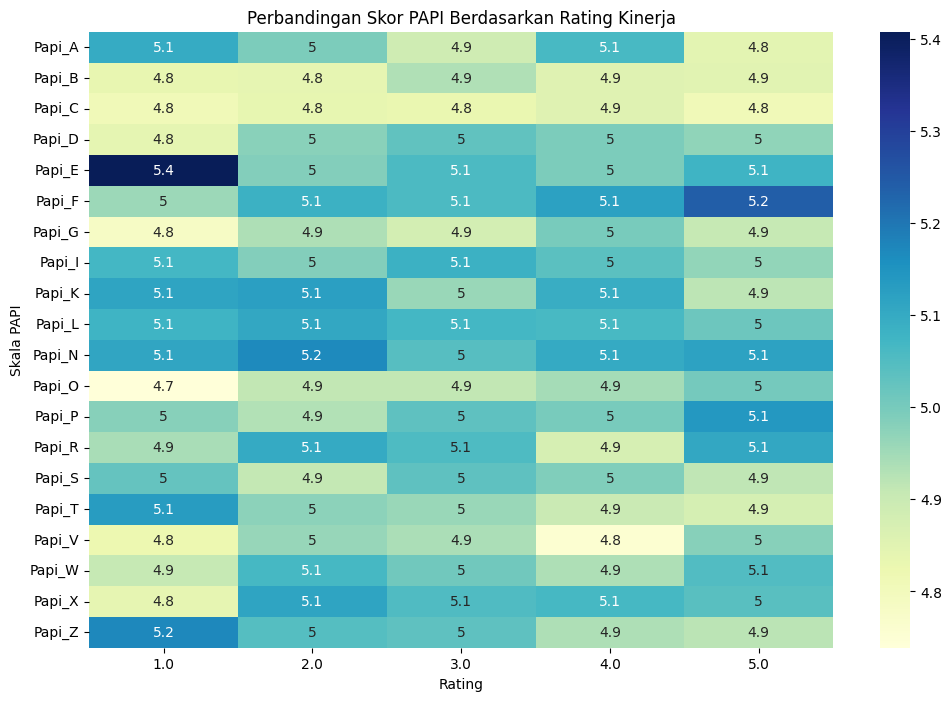

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(papi_summary, cmap='YlGnBu', annot=True)
plt.title('Perbandingan Skor PAPI Berdasarkan Rating Kinerja')
plt.xlabel('Rating')
plt.ylabel('Skala PAPI')
plt.show()


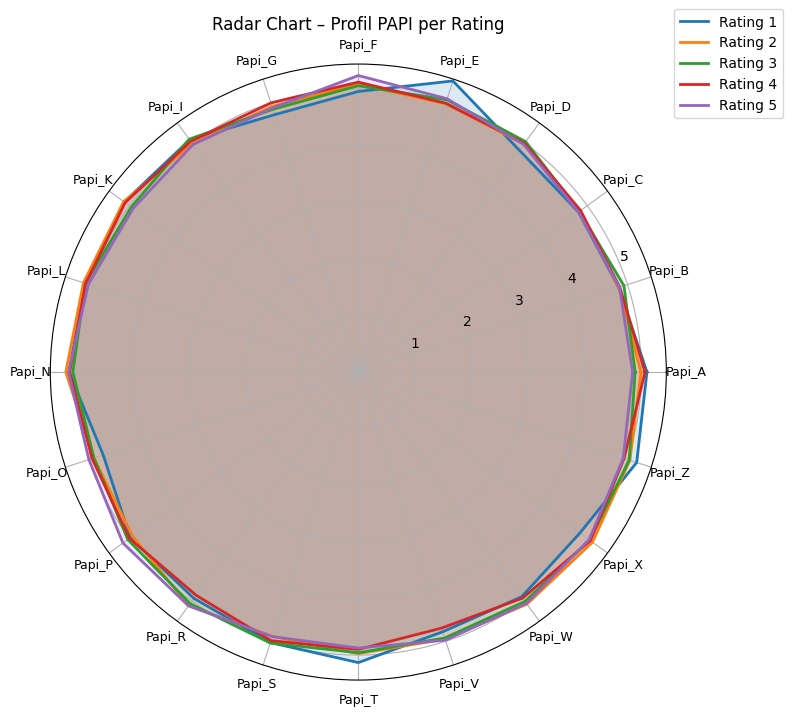

In [33]:
import numpy as np

# ambil mean per rating
mean_by_rating = merged_df.groupby('rating')[papi_cols].mean()

labels = papi_cols
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for rating, row in mean_by_rating.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, values, linewidth=2, label=f'Rating {int(rating)}')
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_title('Radar Chart – Profil PAPI per Rating')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


In [34]:
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)


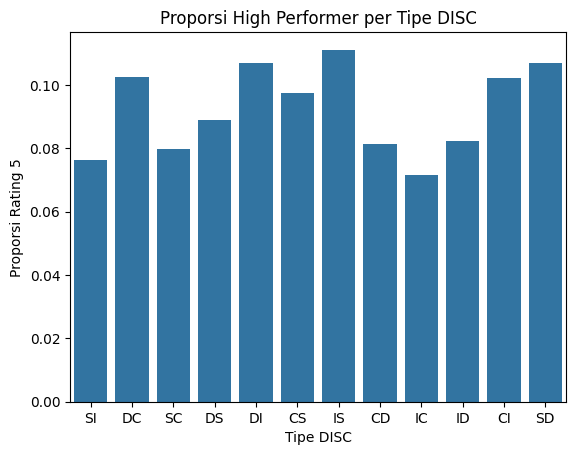

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=merged_df,
    x='disc',
    y='is_high',
    estimator=lambda x: sum(x)/len(x),
    errorbar=None
)
plt.title("Proporsi High Performer per Tipe DISC")
plt.ylabel("Proporsi Rating 5")
plt.xlabel("Tipe DISC")
plt.show()


In [36]:
from scipy.stats import chi2_contingency

table = pd.crosstab(merged_df['disc'], merged_df['is_high'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}")


Chi-square: 14.90, p-value: 0.1870


In [37]:
from scipy.stats import kruskal

groups = [merged_df.loc[merged_df['disc']==d, 'iq'].dropna() for d in merged_df['disc'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H={stat:.2f}, p={p:.4f}")


Kruskal-Wallis H=nan, p=nan


C:\Users\fajar\AppData\Local\Temp\ipykernel_40264\3666865499.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = kruskal(*groups)


rating,1.0,2.0,3.0,4.0,5.0
mbti,,,,,
ENFJ,5.0,5.9,7.6,7.2,7.1
ENFP,7.5,7.2,7.7,8.8,9.6
ENTJ,6.9,7.1,6.4,6.0,6.2
ENTP,6.2,7.2,6.9,5.8,6.7
ESFJ,6.5,5.9,6.4,6.2,6.2
ESFP,8.0,6.6,6.0,5.5,5.5
ESTJ,4.7,6.1,5.7,6.2,4.9
ESTP,5.6,5.4,5.5,4.7,4.7
INFJ,4.3,5.8,5.9,5.2,5.0


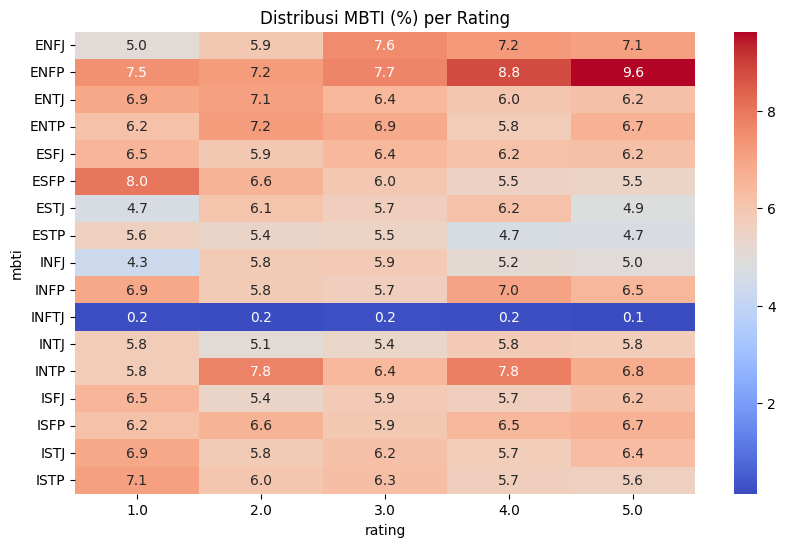

In [38]:
mbti_ct = pd.crosstab(merged_df['mbti'], merged_df['rating'], normalize='columns') * 100
display(mbti_ct.round(1))

plt.figure(figsize=(10,6))
sns.heatmap(mbti_ct, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Distribusi MBTI (%) per Rating')
plt.show()


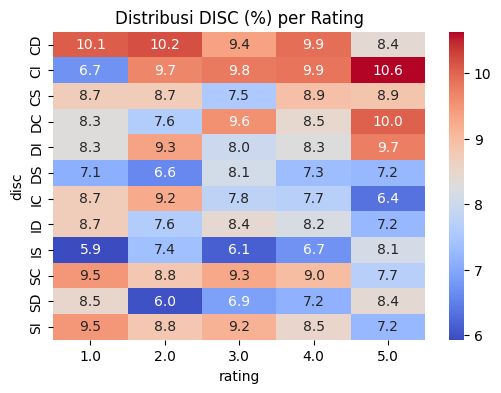

In [39]:
disc_ct = pd.crosstab(merged_df['disc'], merged_df['rating'], normalize='columns') * 100
plt.figure(figsize=(6,4))
sns.heatmap(disc_ct, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Distribusi DISC (%) per Rating')
plt.show()


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom psikometrik numerik
psycho_num = ['iq', 'gtq', 'pauli', 'faxtor', 'tiki'] + [c for c in merged_df.columns if c.startswith('Papi_')]

# Ringkasan statistik per grup
summary = merged_df.groupby('is_high')[psycho_num].mean().T
summary.columns = ['Not High (0)', 'High (1)']
summary['Diff'] = summary['High (1)'] - summary['Not High (0)']
summary = summary.sort_values('Diff', ascending=False)
summary.round(2)


,Not High (0),High (1),Diff
pauli,59.95,60.90,0.95
gtq,27.40,27.89,0.50
Papi_F,5.08,5.24,0.15
Papi_P,4.99,5.14,0.15
Papi_R,5.00,5.10,0.11
Papi_O,4.90,5.00,0.10
Papi_V,4.90,4.98,0.08
tiki,5.49,5.55,0.06
Papi_W,5.00,5.05,0.06
Papi_N,5.09,5.12,0.03


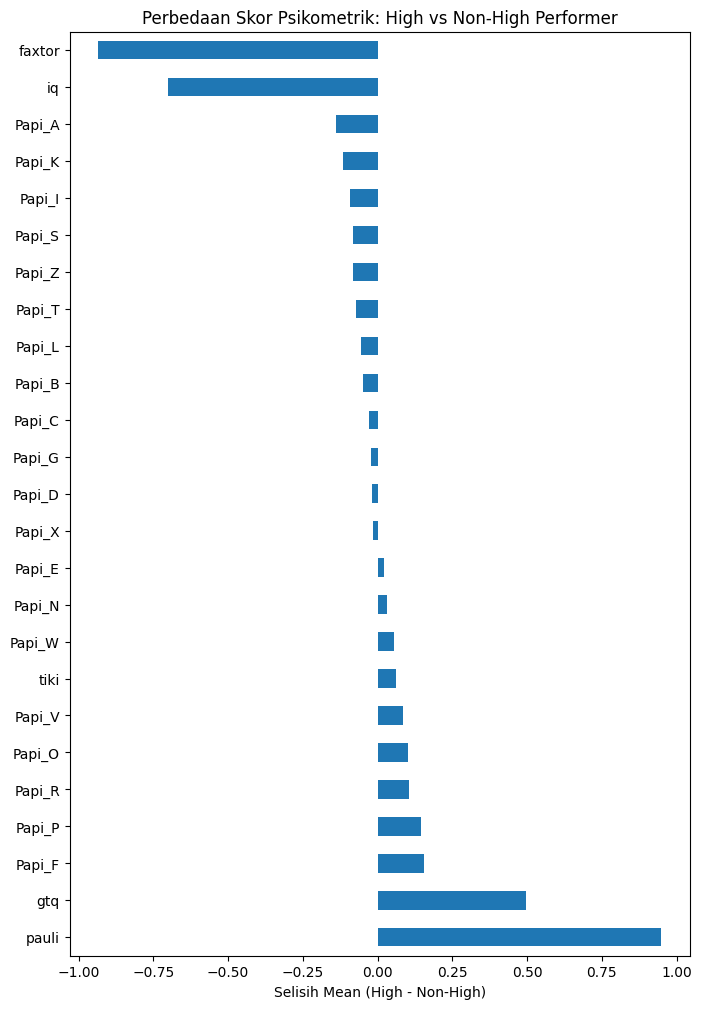

In [41]:
summary['Diff'].plot(kind='barh', figsize=(8,12))
plt.title('Perbedaan Skor Psikometrik: High vs Non-High Performer')
plt.xlabel('Selisih Mean (High - Non-High)')
plt.show()


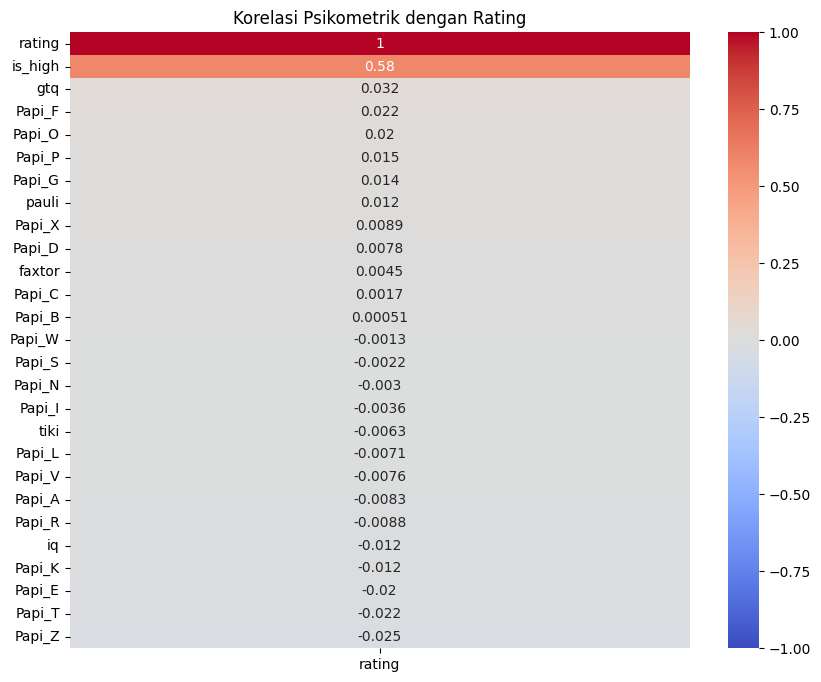

In [42]:
corr = merged_df[psycho_num + ['rating', 'is_high']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr[['rating']].sort_values(by='rating', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Psikometrik dengan Rating")
plt.show()


In [43]:
import plotly.express as px

mean_high = merged_df[merged_df['is_high'] == 1][[c for c in merged_df.columns if c.startswith('Papi_')]].mean()
mean_other = merged_df[merged_df['is_high'] == 0][[c for c in merged_df.columns if c.startswith('Papi_')]].mean()

radar_df = pd.DataFrame({
    'PAPI': mean_high.index,
    'High Performer': mean_high.values,
    'Other': mean_other.values
})

fig = px.line_polar(
    radar_df.melt(id_vars='PAPI', var_name='Group', value_name='Score'),
    r='Score', theta='PAPI', color='Group', line_close=True,
)
fig.update_layout(title='Profil PAPI: High Performer vs Others')
fig.show()


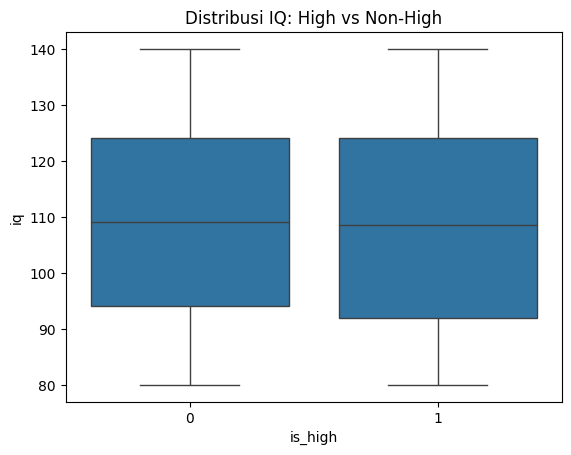

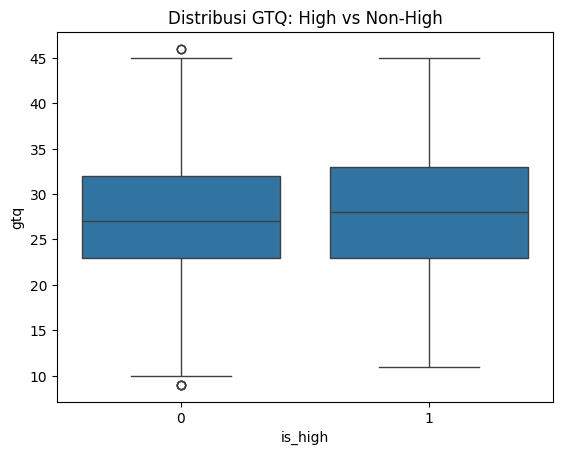

In [44]:
sns.boxplot(x='is_high', y='iq', data=merged_df)
plt.title("Distribusi IQ: High vs Non-High")
plt.show()

sns.boxplot(x='is_high', y='gtq', data=merged_df)
plt.title("Distribusi GTQ: High vs Non-High")
plt.show()


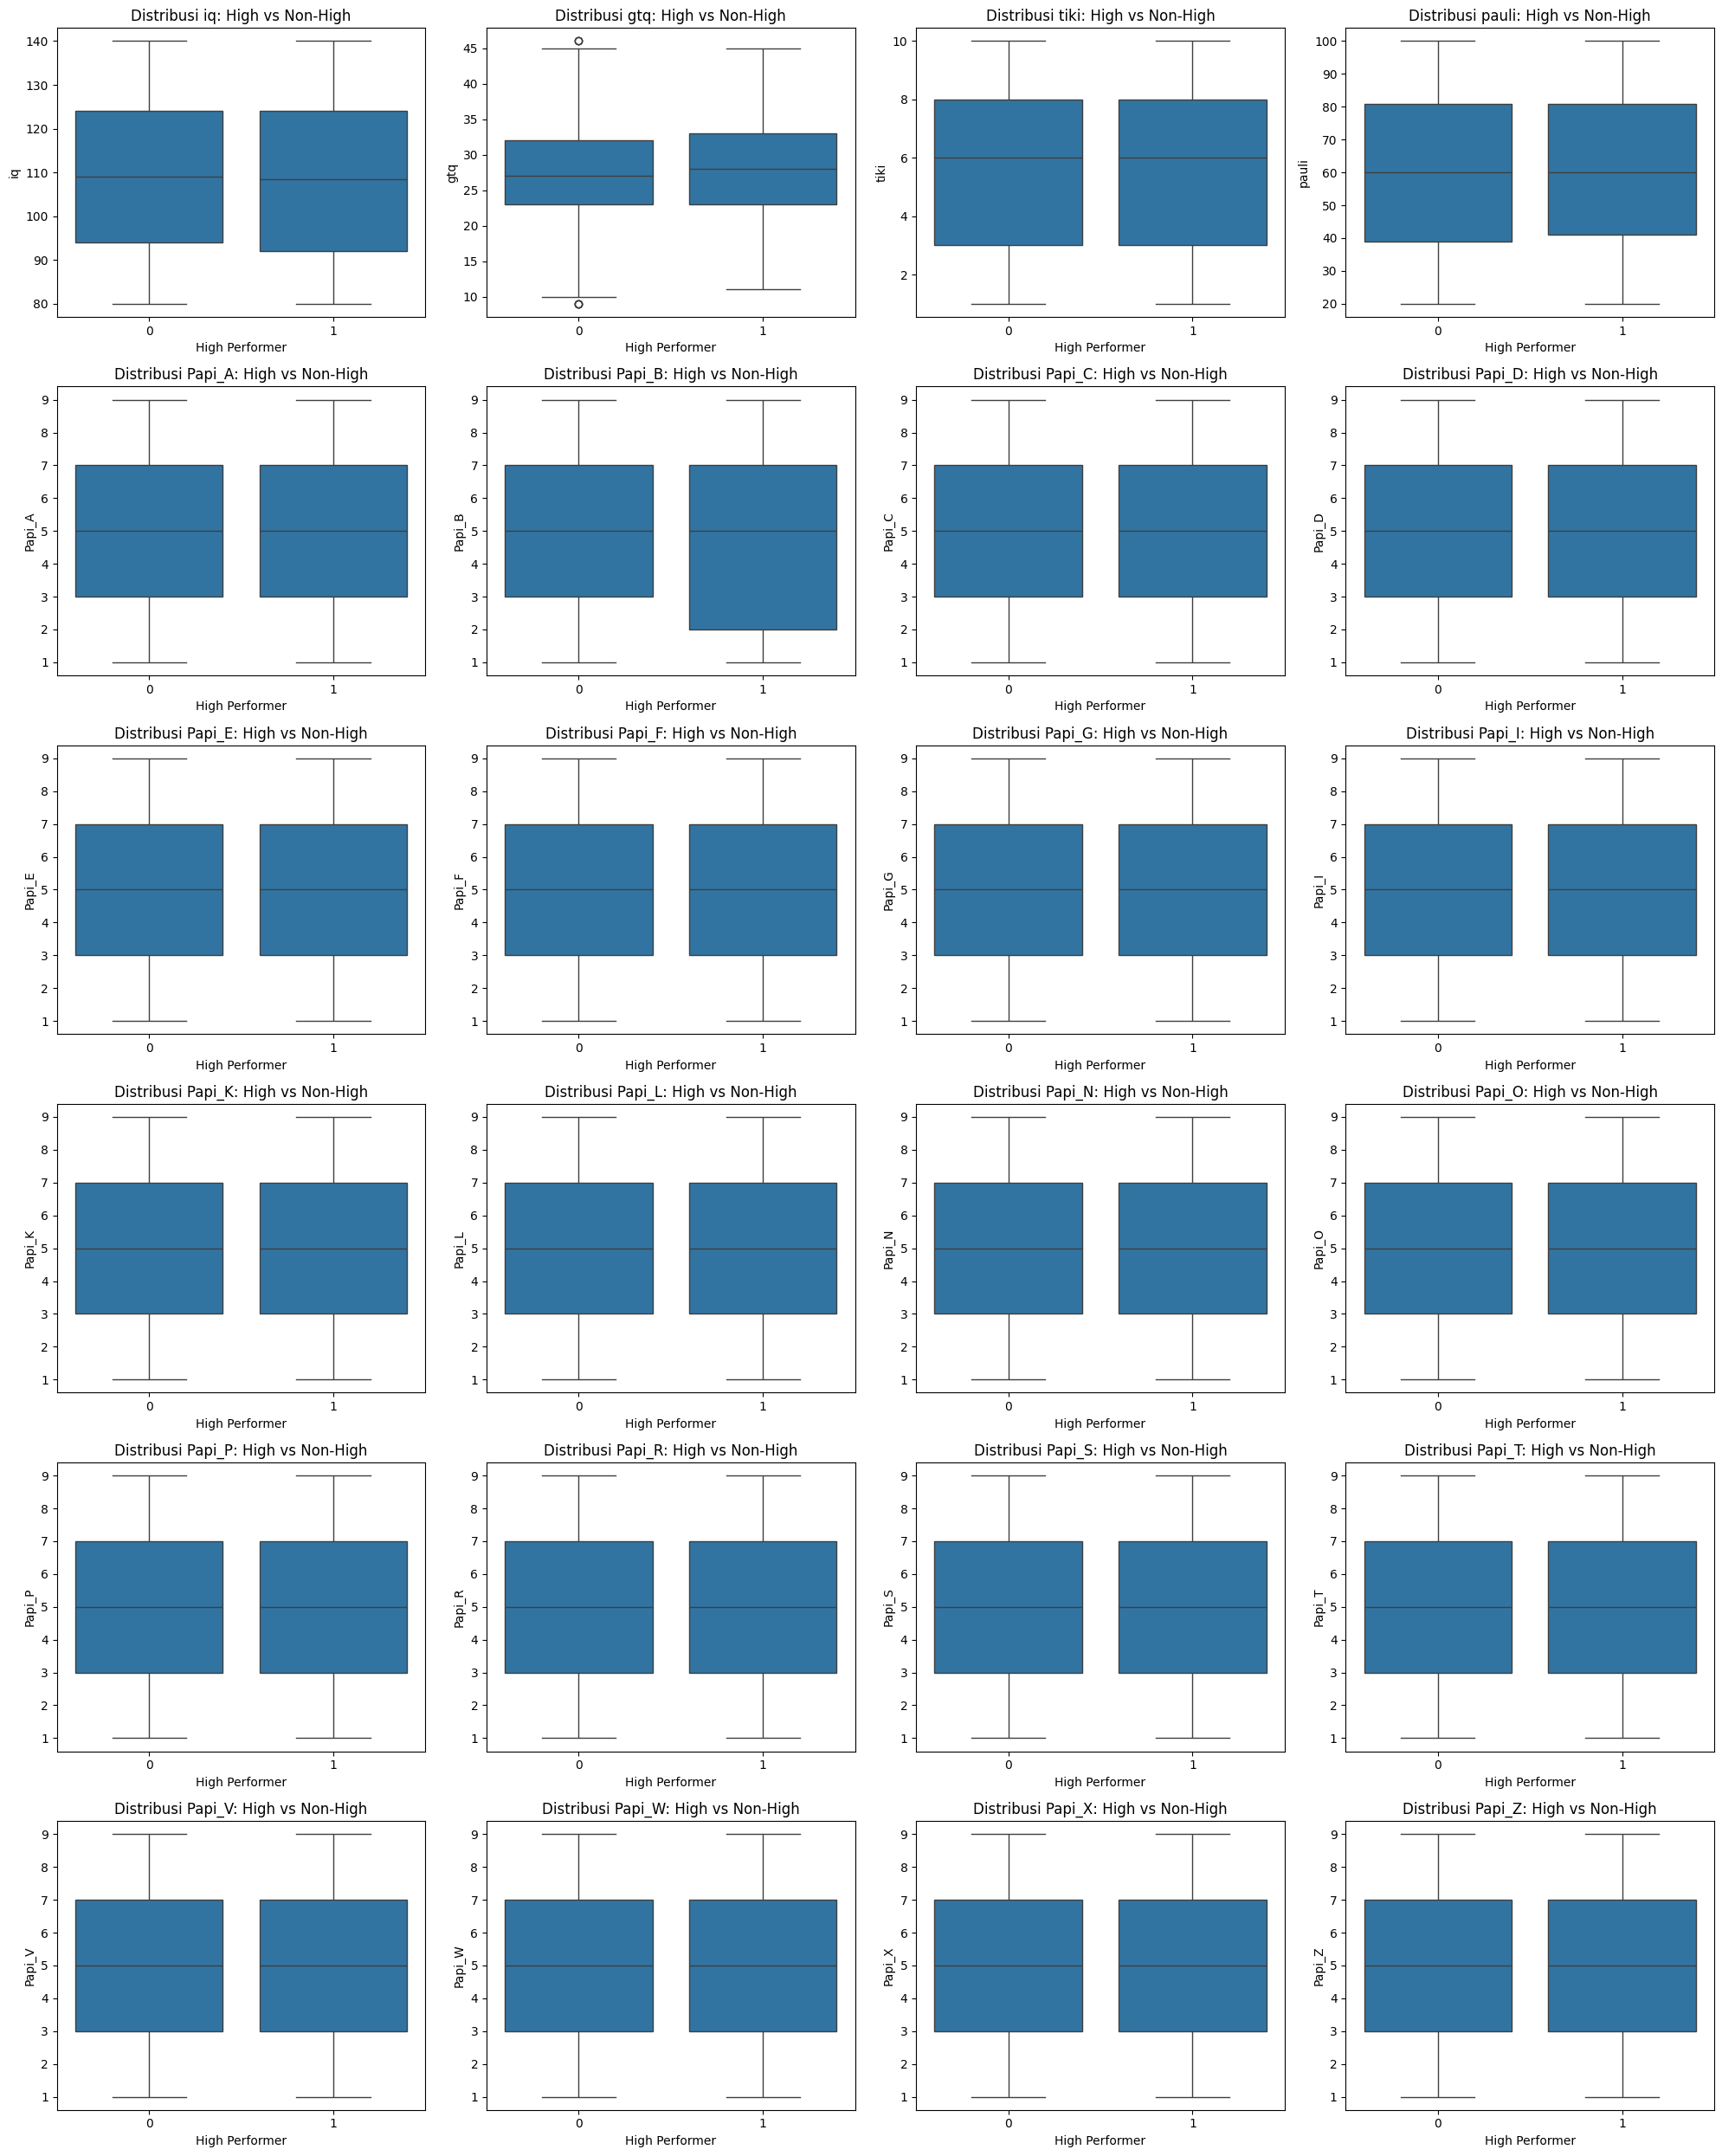

In [ ]:
# Definisikan semua variabel psikometrik yang ingin dianalisis
psychometric_vars = [
    'iq', 'gtq', 'tiki', 'pauli',
    'Papi_A', 'Papi_B', 'Papi_C', 'Papi_D', 'Papi_E', 'Papi_F',
    'Papi_G', 'Papi_I', 'Papi_K', 'Papi_L', 'Papi_N', 'Papi_O',
    'Papi_P', 'Papi_R', 'Papi_S', 'Papi_T', 'Papi_V', 'Papi_W',
    'Papi_X', 'Papi_Z'
]

# Buat subplot grid
fig, axes = plt.subplots(6, 4, figsize=(20, 25))
axes = axes.flatten()

for i, var in enumerate(psychometric_vars):
    if i < len(axes):
        sns.boxplot(x='is_high', y=var, data=merged_df, ax=axes[i])
        axes[i].set_title(f"Distribusi {var}: High vs Non-High")
        axes[i].set_xlabel("High Performer")
        axes[i].set_ylabel(var)

# Hilangkan subplot yang tidak terpakai
for j in range(len(psychometric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

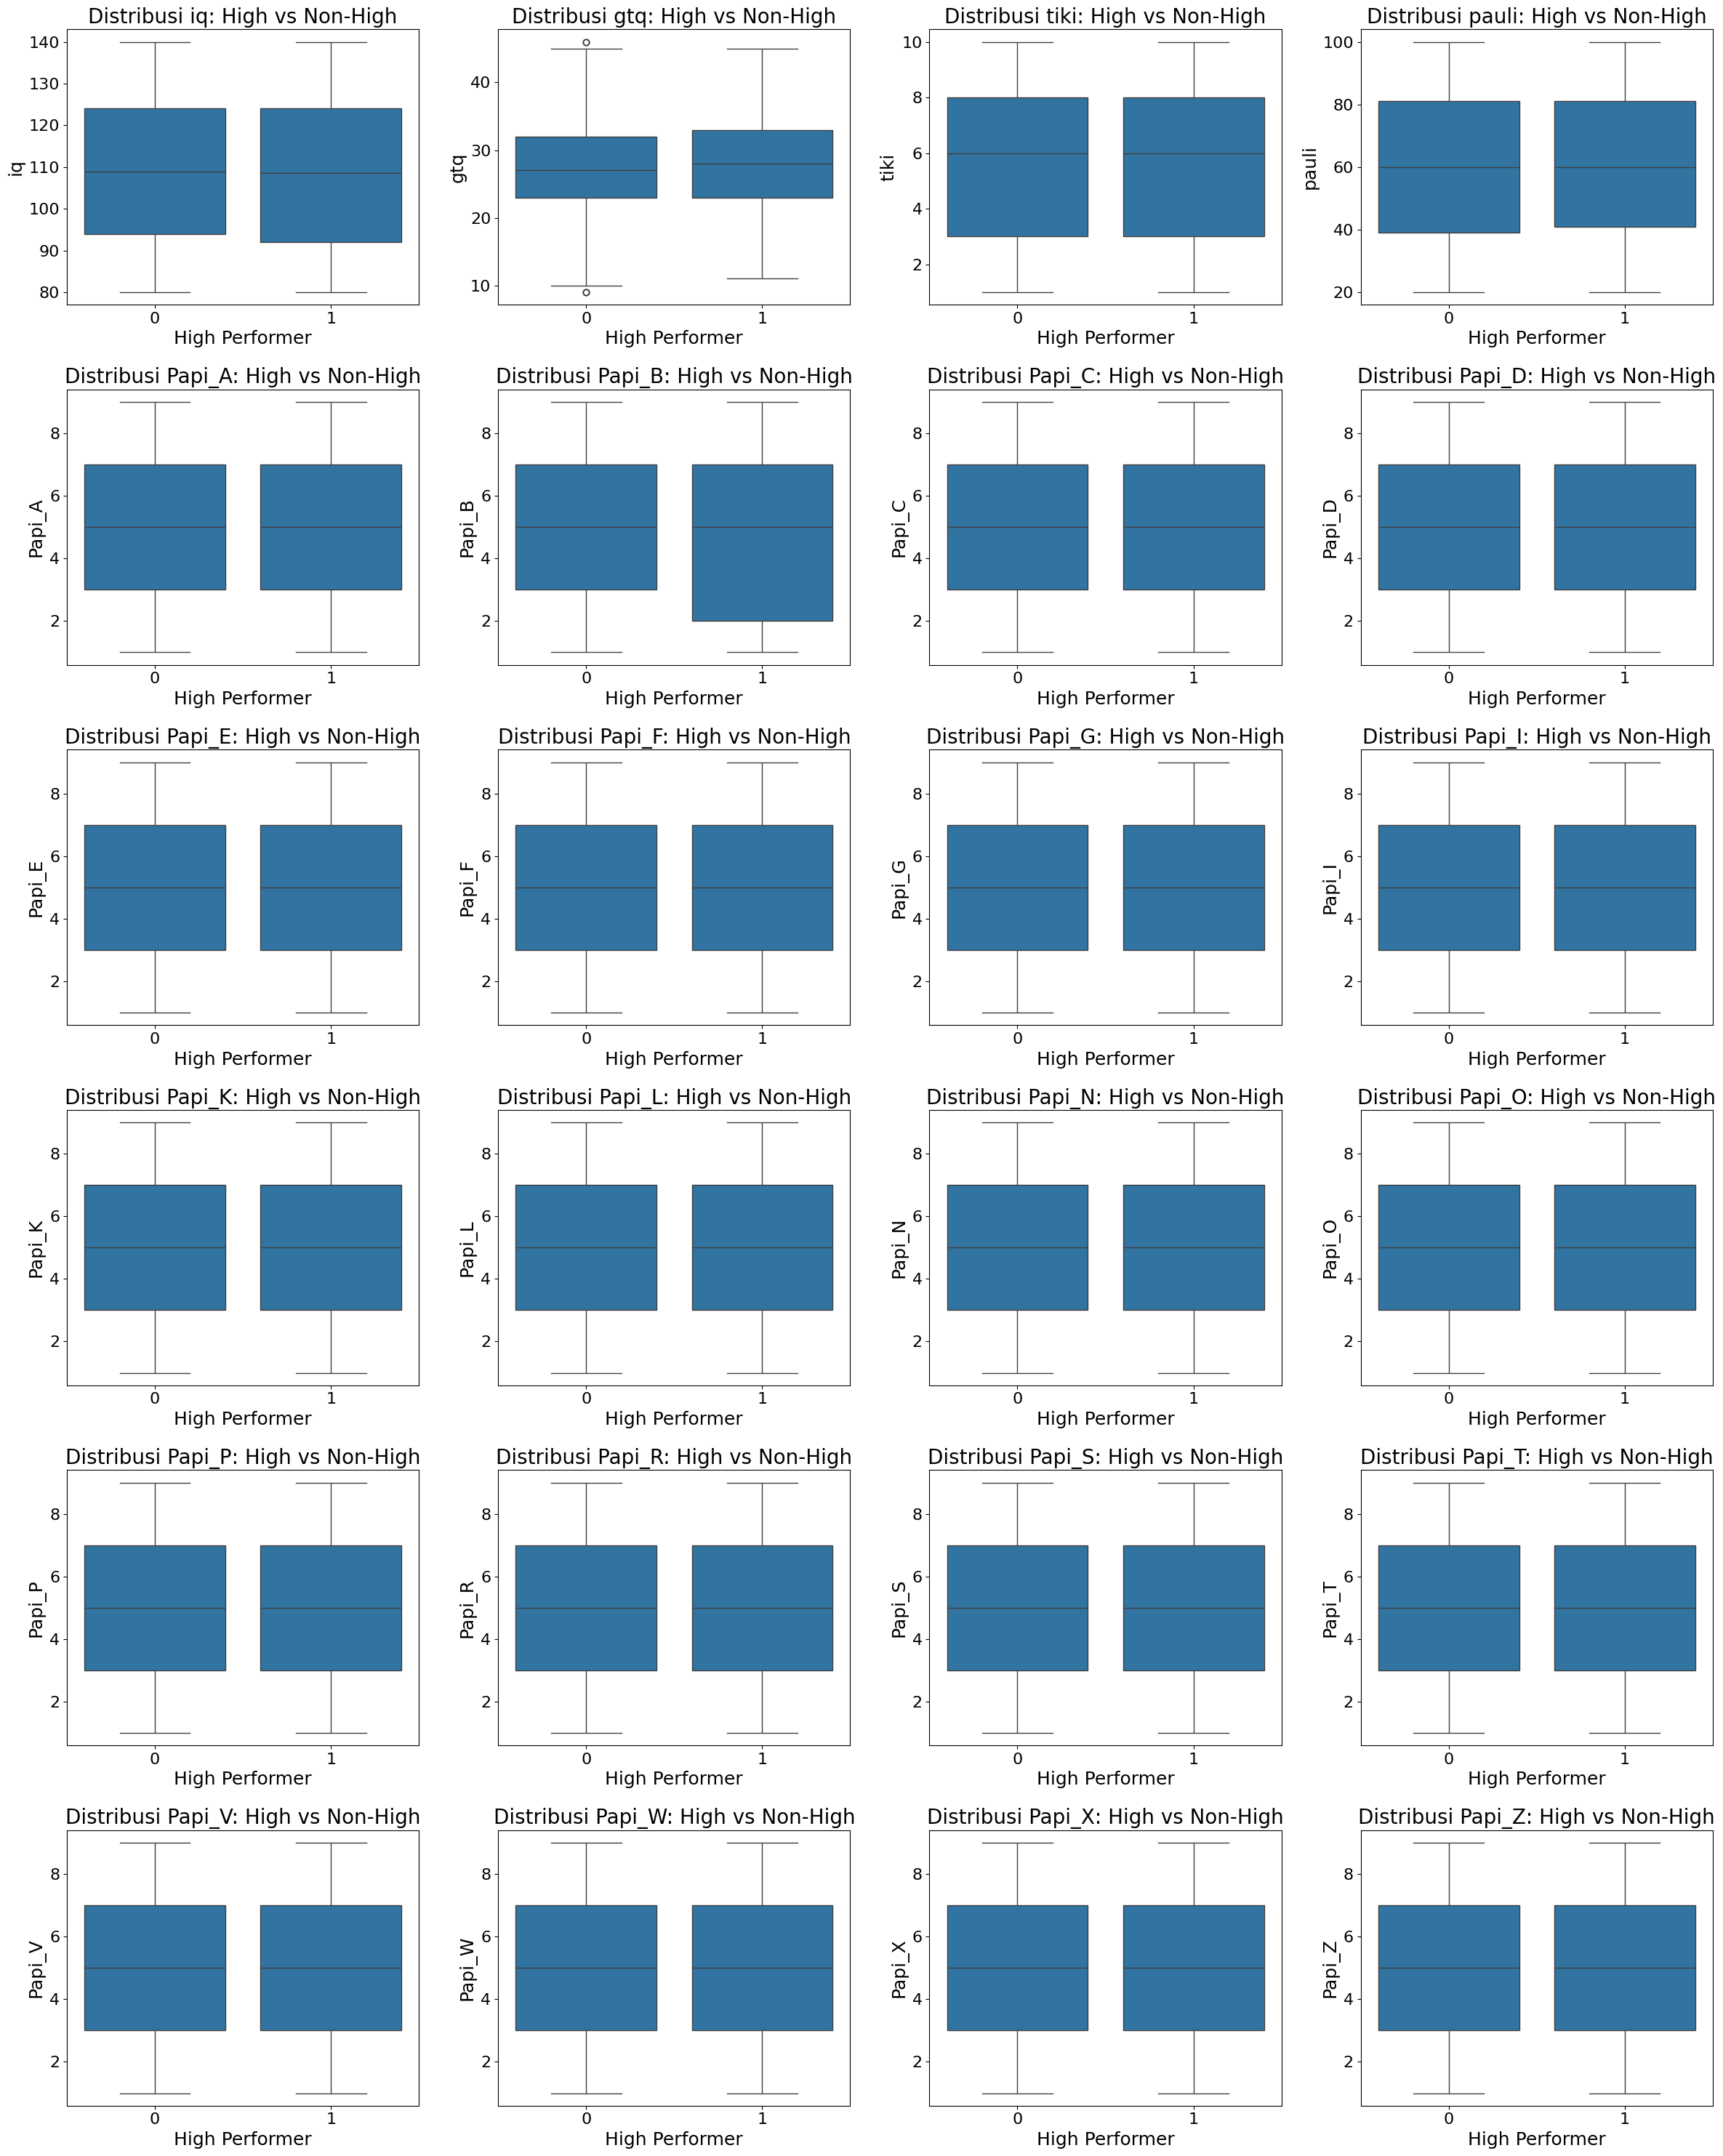

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16
})

# Definisikan semua variabel psikometrik
psychometric_vars = [
    'iq', 'gtq', 'tiki', 'pauli',
    'Papi_A', 'Papi_B', 'Papi_C', 'Papi_D', 'Papi_E', 'Papi_F',
    'Papi_G', 'Papi_I', 'Papi_K', 'Papi_L', 'Papi_N', 'Papi_O',
    'Papi_P', 'Papi_R', 'Papi_S', 'Papi_T', 'Papi_V', 'Papi_W',
    'Papi_X', 'Papi_Z'
]

# Buat subplot grid
fig, axes = plt.subplots(6, 4, figsize=(24, 30))  # Diperbesar untuk font besar
axes = axes.flatten()

for i, var in enumerate(psychometric_vars):
    if i < len(axes):
        sns.boxplot(x='is_high', y=var, data=merged_df, ax=axes[i])
        axes[i].set_title(f"Distribusi {var}: High vs Non-High", fontsize=20)
        axes[i].set_xlabel("High Performer", fontsize=18)
        axes[i].set_ylabel(var, fontsize=18)
        
        # Besarkan font tick labels
        axes[i].tick_params(axis='x', labelsize=16)
        axes[i].tick_params(axis='y', labelsize=16)

# Hilangkan subplot yang tidak terpakai
for j in range(len(psychometric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

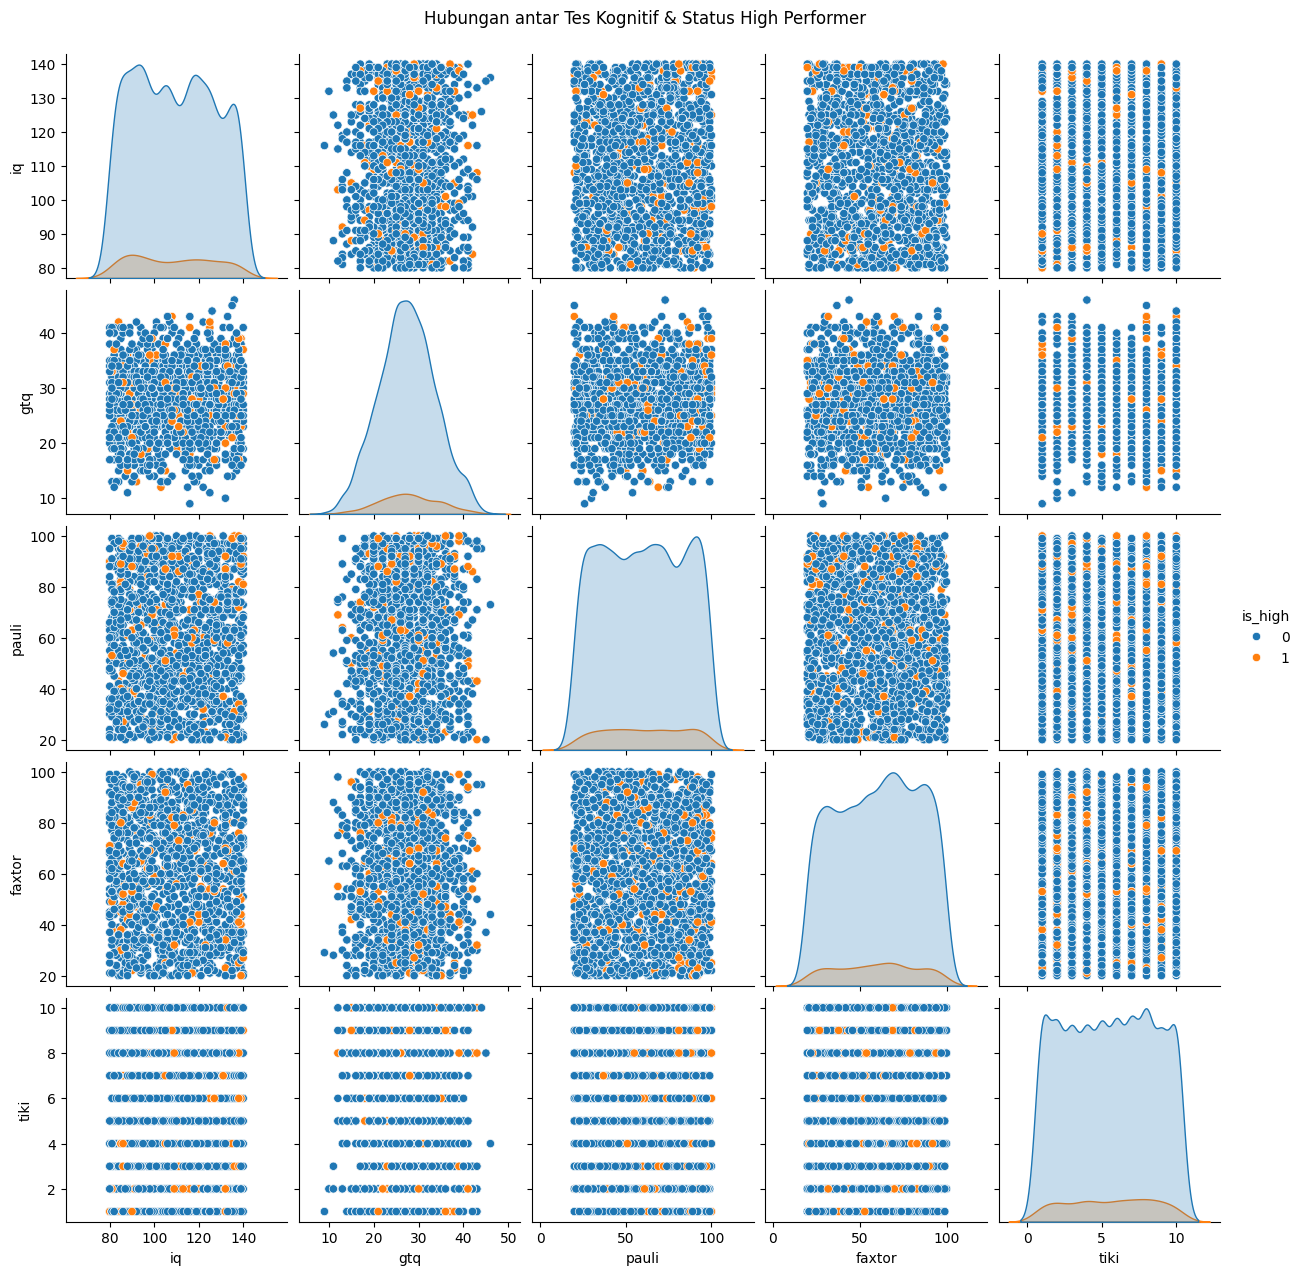

In [33]:
sns.pairplot(merged_df, vars=['iq','gtq','pauli','faxtor','tiki'], hue='is_high')
plt.suptitle("Hubungan antar Tes Kognitif & Status High Performer", y=1.02)
plt.show()


In [34]:
disc_rate = merged_df.groupby(['disc','is_high']).size().unstack(fill_value=0)
disc_rate['%High'] = disc_rate[1] / disc_rate.sum(axis=1) * 100
disc_rate.sort_values('%High', ascending=False)


is_high,0,1,%High
disc,,,
IS,440,55,11.111111
SD,476,57,10.694184
DI,552,66,10.679612
DC,596,68,10.240964
CI,633,72,10.212766
CS,555,60,9.756098
DS,502,49,8.892922
ID,547,49,8.221477
CD,643,57,8.142857


In [35]:
mbti_rate = merged_df.groupby(['mbti','is_high']).size().unstack(fill_value=0)
mbti_rate['%High'] = mbti_rate[1] / mbti_rate.sum(axis=1) * 100
mbti_rate.sort_values('%High', ascending=False)


is_high,0,1,%High
mbti,,,
ENFP,542,65,10.708402
ISFP,424,45,9.594883
ISFJ,397,42,9.567198
INTJ,370,39,9.535452
ISTJ,410,43,9.492274
ENTP,440,45,9.278351
INFP,435,44,9.185804
ENFJ,476,48,9.160305
ENTJ,435,42,8.805031


In [36]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Pisahkan fitur numerik dan kategorikal
# num_cols = ['iq','gtq','pauli','faxtor','tiki'] + [c for c in merged_df.columns if c.startswith('Papi_')]
# cat_cols = ['disc','mbti']

# X = merged_df[num_cols + cat_cols]
# y = merged_df['is_high']

# # One-hot encoding untuk kategori
# preprocess = ColumnTransformer([
#     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
# ], remainder='passthrough')

# # Pipeline model
# model = Pipeline([
#     ('preprocess', preprocess),
#     ('rf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'))
# ])

# # Split & Train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
# model.fit(X_train, y_train)

# # Evaluasi
# y_pred = model.predict(X_test)
# print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))


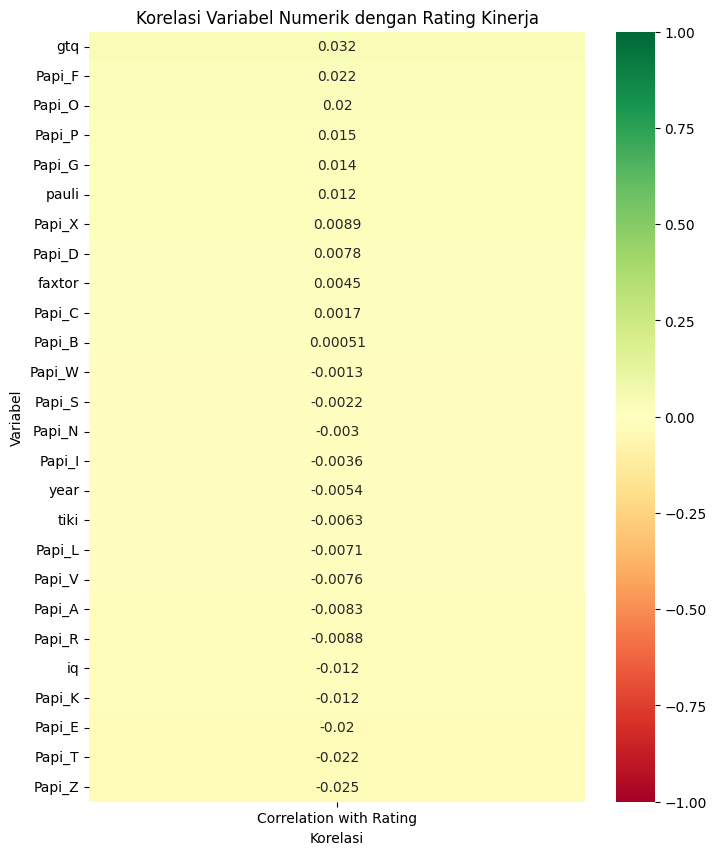

In [ ]:
# Ambil kolom numerik, tapi buang kolom target 'rating' dan 'is_high'
num_cols = merged_df.select_dtypes(include=['float64','int64']).columns
num_cols = num_cols.drop(['rating', 'is_high'], errors='ignore')

# Hitung korelasi antara setiap variabel numerik dengan rating
corr_with_rating = merged_df[num_cols].corrwith(merged_df['rating']).sort_values(ascending=False)

# Visualisasi heatmap satu kolom
plt.figure(figsize=(8,10))
sns.heatmap(corr_with_rating.to_frame(name='Correlation with Rating'), 
            annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Korelasi Variabel Numerik dengan Rating Kinerja')
plt.xlabel('Korelasi')
plt.ylabel('Variabel')
plt.show()


is_high,0,1
Papi_A,4.99,4.85
Papi_B,4.90,4.85
Papi_C,4.84,4.81
Papi_D,4.99,4.97
Papi_E,5.06,5.08
Papi_F,5.08,5.24
Papi_G,4.93,4.91
Papi_I,5.06,4.97
Papi_K,5.03,4.92
Papi_L,5.07,5.01


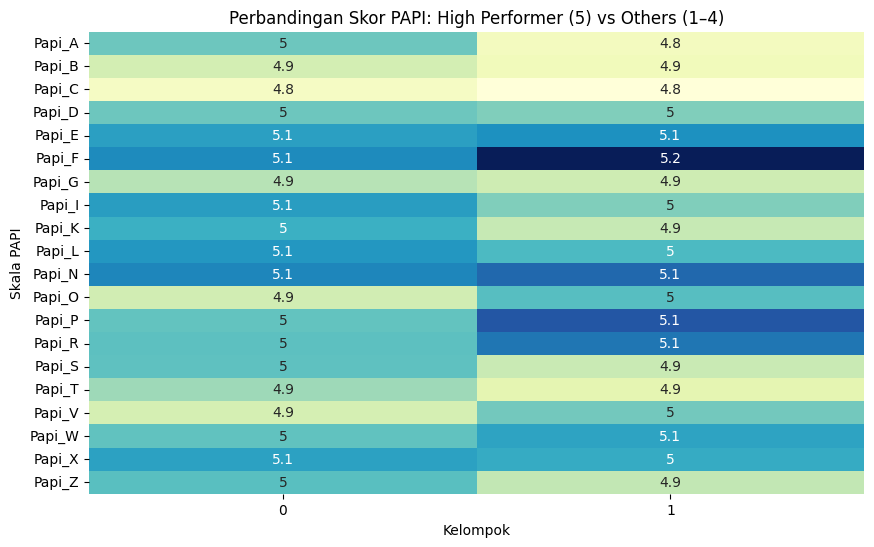

In [ ]:
# Statistik per grup
summary = merged_df.groupby('is_high')[papi_cols].mean().T
display(summary.round(2))

plt.figure(figsize=(10,6))
sns.heatmap(summary, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Perbandingan Skor PAPI: High Performer (5) vs Others (1–4)')
plt.xlabel('Kelompok')
plt.ylabel('Skala PAPI')
plt.show()


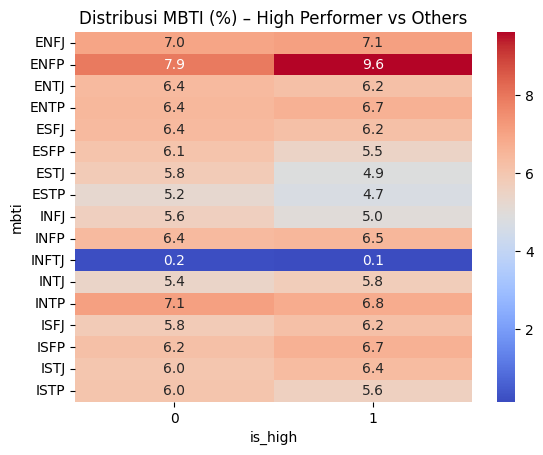

In [ ]:
mbti_ct = pd.crosstab(merged_df['mbti'], merged_df['is_high'], normalize='columns') * 100
sns.heatmap(mbti_ct, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Distribusi MBTI (%) – High Performer vs Others')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

high = merged_df.loc[merged_df['is_high']==1, papi_cols]
low  = merged_df.loc[merged_df['is_high']==0, papi_cols]

ttest_results = {col: ttest_ind(high[col].dropna(), low[col].dropna(), equal_var=False)[1] for col in papi_cols}
pd.Series(ttest_results).sort_values()


Papi_F    0.139552
Papi_P    0.160950
Papi_A    0.171575
Papi_K    0.283156
Papi_R    0.292452
Papi_O    0.327156
Papi_I    0.388438
Papi_V    0.421661
Papi_S    0.432053
Papi_Z    0.433660
Papi_T    0.489050
Papi_W    0.584631
Papi_L    0.615505
Papi_B    0.638646
Papi_N    0.763015
Papi_C    0.775314
Papi_G    0.837897
Papi_E    0.841708
Papi_D    0.866533
Papi_X    0.879928
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = merged_df.select_dtypes(include=['float64','int64']).drop(columns=['rating', 'is_high', 'year'])
y = merged_df['is_high']

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances)


gtq       0.054060
iq        0.052635
pauli     0.051070
faxtor    0.049863
Papi_X    0.039815
Papi_T    0.039729
Papi_L    0.039636
Papi_V    0.039622
Papi_S    0.039214
Papi_F    0.039194
Papi_O    0.038761
Papi_B    0.038588
Papi_C    0.038578
Papi_Z    0.038184
Papi_D    0.037999
Papi_E    0.037750
Papi_N    0.037746
Papi_K    0.037622
Papi_A    0.037601
Papi_I    0.037335
Papi_G    0.037186
Papi_W    0.036942
Papi_R    0.036064
Papi_P    0.034778
tiki      0.030027
dtype: float64